##**1. Access Datasets from Google Colab**


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# load TRAIN datasets
train_connectome = pd.read_csv('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
train_categorical = pd.read_excel('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')
train_solutions = pd.read_excel('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TRAIN/TRAINING_SOLUTIONS.xlsx')
train_quantitative = pd.read_excel('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')

# load TEST datasets
test_quantitative = pd.read_excel('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TEST/TEST_QUANTITATIVE_METADATA.xlsx')
test_connectome = pd.read_csv('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
test_categorical = pd.read_excel('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TEST/TEST_CATEGORICAL.xlsx')


### Explore the data
# display a preview of train datasets
print("Display first 5 rows of TRAIN datasets")
print(train_quantitative.head())
print(train_connectome.head())
print(train_categorical.head())
print(train_solutions.head())


# info of datasets
print("Exploring info of TRAIN datasets")
print(train_quantitative.info())
print(train_connectome.info())
print(train_categorical.info())
print(train_solutions.info())

# describe the TRAIN datasets
print("Describe TRAIN datasets")
print(train_quantitative.describe())
print(train_connectome.describe())
print(train_categorical.describe())
print(train_solutions.describe())


# display a preview of test datasets
print(test_quantitative.head())
print(test_connectome.head())
print(test_categorical.head())

Display first 5 rows of TRAIN datasets
  participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   UmrK0vMLopoR          40.00                    13               3   
1   CPaeQkhcjg7d         -94.47                    14               3   
2   Nb4EetVPm3gs         -46.67                    14               4   
3   p4vPhVu91o4b         -26.68                    10               5   
4   M09PXs7arQ5E           0.00                    14               5   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0              10               47               13              11   
1              13               34               18              23   
2              10               35               16              10   
3              12               39               19              16   
4              15               40               20              24   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0              28   

##**2. Data cleaning**


### 1. train_quantitative dataset

Check if any values are missing in the dataset






In [5]:
train_quantitative_missing_val = train_quantitative.isna().sum()
train_quantitative_missing_percentage = train_quantitative_missing_val / len(train_quantitative) * 100
print({"Missing values for train quantitative is \n": train_quantitative_missing_percentage})

{'Missing values for train quantitative is \n': participant_id                 0.000000
EHQ_EHQ_Total                  0.000000
ColorVision_CV_Score           0.000000
APQ_P_APQ_P_CP                 0.000000
APQ_P_APQ_P_ID                 0.000000
APQ_P_APQ_P_INV                0.000000
APQ_P_APQ_P_OPD                0.000000
APQ_P_APQ_P_PM                 0.000000
APQ_P_APQ_P_PP                 0.000000
SDQ_SDQ_Conduct_Problems       0.000000
SDQ_SDQ_Difficulties_Total     0.000000
SDQ_SDQ_Emotional_Problems     0.000000
SDQ_SDQ_Externalizing          0.000000
SDQ_SDQ_Generating_Impact      0.000000
SDQ_SDQ_Hyperactivity          0.000000
SDQ_SDQ_Internalizing          0.000000
SDQ_SDQ_Peer_Problems          0.000000
SDQ_SDQ_Prosocial              0.000000
MRI_Track_Age_at_Scan         29.678483
dtype: float64}


Check the distribution of values before processing (for MRI_Track_Age_at_Scan)




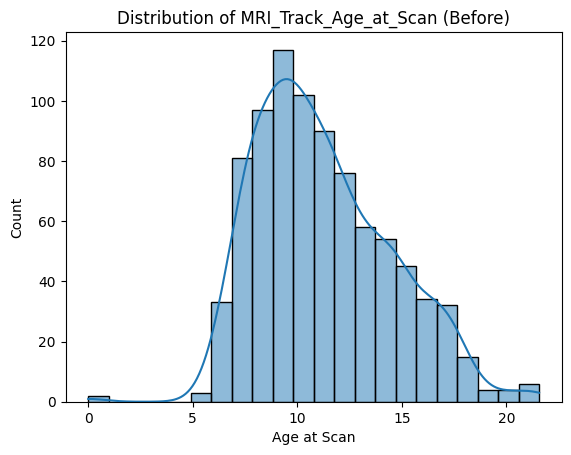

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_quantitative['MRI_Track_Age_at_Scan'], kde=True)
plt.title("Distribution of MRI_Track_Age_at_Scan (Before)")
plt.xlabel("Age at Scan")
plt.show()

Using KNN to impute the data for this particular column, since using average will create a spike, which will impact the score of the model.


Missing values after KNN imputation:
0


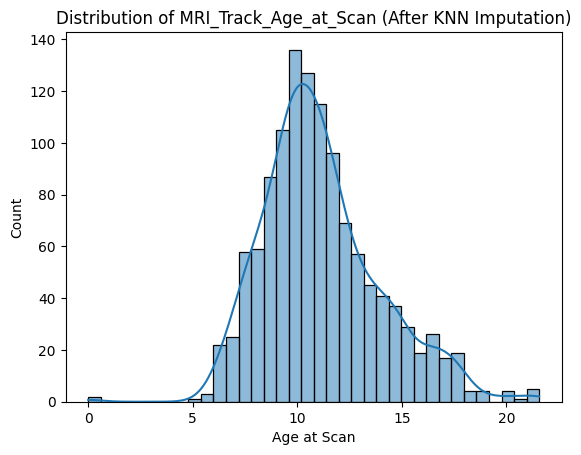

In [7]:
!pip install scikit-learn
from sklearn.impute import KNNImputer

# Select only numerical features for KNN imputation, exclude Participant_id
numeric_features = train_quantitative.select_dtypes(include=['float64', 'int64'])

# Initialize and apply KNN imputer
imputer = KNNImputer(n_neighbors=11)
imputed_data = imputer.fit_transform(numeric_features)

# Convert the imputed data back to a DataFrame
train_quantitative_imputed = pd.DataFrame(imputed_data, columns=numeric_features.columns)

# Update the original DataFrame with the imputed values
train_quantitative['MRI_Track_Age_at_Scan'] = train_quantitative_imputed['MRI_Track_Age_at_Scan']


# Verify that all missing values have been filled
print("Missing values after KNN imputation:")
print(train_quantitative['MRI_Track_Age_at_Scan'].isna().sum())

# Plot the new distribution
sns.histplot(train_quantitative['MRI_Track_Age_at_Scan'], kde=True)
plt.title("Distribution of MRI_Track_Age_at_Scan (After KNN Imputation)")
plt.xlabel("Age at Scan")
plt.show()

### 2. train_categorical dataset


to clean: train_categorical.
The TRAIN_CATEGORICAL_METADATA dataset contains categorical metadata for training participants. This dataset helps the model learn patterns associated with ADHD diagnosis and sex differences based on demographic and socio-environmental factors.

In [8]:
train_categorical.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [9]:
train_categorical.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [10]:
train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].dtype

dtype('float64')

In [11]:
import numpy as np

In [12]:
nan_count = np.sum(train_categorical.isnull(), axis = 0)
nan_count

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,11
PreInt_Demos_Fam_Child_Race,0
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,0
Barratt_Barratt_P1_Occ,0
Barratt_Barratt_P2_Edu,0
Barratt_Barratt_P2_Occ,0


In [13]:
# nan_detected tells us that a column has null values, not how many
nan_detected = nan_count!=0
nan_detected

is_int_or_float = (train_categorical.dtypes == 'int64') | (train_categorical.dtypes == 'float64')
is_int_or_float

# to_impute will tell us if a given feature is both of numeric data AND has missing values
to_impute = nan_detected & is_int_or_float
to_impute

to_impute_selected = train_categorical.columns[to_impute].tolist()
to_impute_selected

['PreInt_Demos_Fam_Child_Ethnicity']

In [14]:
for colname in to_impute_selected:
    train_categorical[colname +'_na'] = train_categorical[colname].isnull()
train_categorical.head()

for colname in to_impute_selected:
    train_categorical[colname].fillna(np.mean(train_categorical[colname]), inplace=True)

for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(train_categorical[colname].isnull(), axis = 0)))

PreInt_Demos_Fam_Child_Ethnicity missing values count :0


<ipython-input-14-f41a264f532a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_categorical[colname].fillna(np.mean(train_categorical[colname]), inplace=True)


In [15]:
nan_count = np.sum(train_categorical.isnull(), axis = 0)
nan_count

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,0
PreInt_Demos_Fam_Child_Race,0
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,0
Barratt_Barratt_P1_Occ,0
Barratt_Barratt_P2_Edu,0
Barratt_Barratt_P2_Occ,0


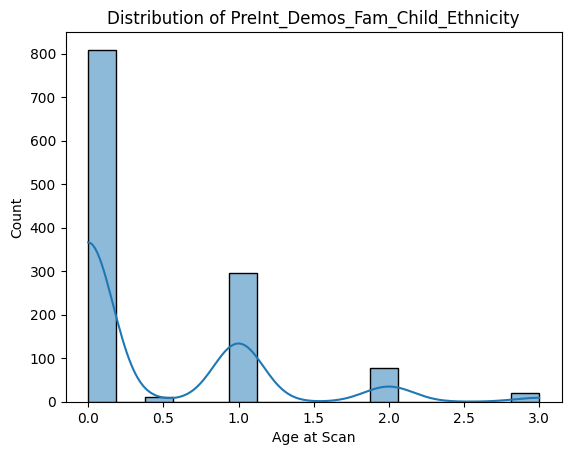

In [16]:
# Plot the new distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_categorical['PreInt_Demos_Fam_Child_Ethnicity'], kde=True)
plt.title("Distribution of PreInt_Demos_Fam_Child_Ethnicity")
plt.xlabel("Age at Scan")
plt.show()

removed missing values ; filled with mean!

In [17]:
train_categorical.dtypes

,0
participant_id,object
Basic_Demos_Enroll_Year,int64
Basic_Demos_Study_Site,int64
PreInt_Demos_Fam_Child_Ethnicity,float64
PreInt_Demos_Fam_Child_Race,int64
MRI_Track_Scan_Location,int64
Barratt_Barratt_P1_Edu,int64
Barratt_Barratt_P1_Occ,int64
Barratt_Barratt_P2_Edu,int64
Barratt_Barratt_P2_Occ,int64


only participant ID is an object, and that's arbitrary, so we **don't** need to implement one-hot encoding on it.


next step: finding numerical outliers, and scaling / normalizing data!

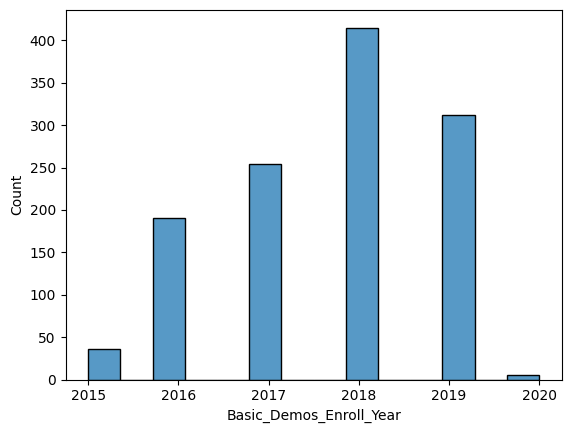

In [18]:
df = train_categorical # copy, also short
import seaborn as sns
fig = sns.histplot(df, x='Basic_Demos_Enroll_Year')

### 3. train_connectome dataset

In [19]:
train_connectome.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,0.548480,0.713607,0.557319,0.524369,0.693364,0.770032,0.724406,0.390118,0.547912,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,0.427740,0.363022,0.402862,0.363003,0.534558,0.345347,0.409471,0.303328,0.402515,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,0.139572,0.390106,-0.087041,0.196852,0.088148,0.023843,0.381782,0.068979,0.377488,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,0.133561,0.778326,0.416355,0.471840,0.568460,0.633660,0.501113,0.345461,0.467943,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,0.126699,0.575446,0.509422,0.363193,0.427544,0.449924,0.451796,0.223927,0.298248,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [20]:
# check for missing values
print(train_connectome.isnull().sum())
train_connectome.dropna(inplace=True)

participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64


In [21]:
# check data types
train_connectome.dtypes

,0
participant_id,object
0throw_1thcolumn,float64
0throw_2thcolumn,float64
0throw_3thcolumn,float64
0throw_4thcolumn,float64
...,...
196throw_198thcolumn,float64
196throw_199thcolumn,float64
197throw_198thcolumn,float64
197throw_199thcolumn,float64


In [22]:
print(train_connectome.duplicated().sum())
print(train_connectome.describe())

0
       0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  0throw_4thcolumn  \
count        304.000000        304.000000        304.000000        304.000000   
mean           0.219970          0.610695          0.419458          0.395230   
std            0.249959          0.163408          0.248612          0.244413   
min           -0.713362         -0.118109         -0.376194         -0.379673   
25%            0.059497          0.511165          0.243170          0.267692   
50%            0.219107          0.634942          0.453220          0.442026   
75%            0.396008          0.727476          0.605324          0.561536   
max            0.778206          0.904572          0.875906          0.915949   

       0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  0throw_8thcolumn  \
count        304.000000        304.000000        304.000000        304.000000   
mean           0.480795          0.530394          0.496573          0.287560   
std            0.256404  